In [10]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
from astropy.constants import c
from astropy import constants as const
import astropy.units as u
from scipy import special


def weight(n):
    return 2 * n**2

def boltzmann(n1, n2, eV, T):
    k = 8.6173303e-5  # Boltzmann constant in eV/K
    g_n = weight(n2) / weight(n1) * np.exp(-eV / (k * T))
    return g_n

def CIV(T):
    sigma_Lya = 5.9e-14 * (T / 1e4) ** (-1/2)
    sigma_CIV = (0.19 / 0.4164) * sigma_Lya * (12) ** (0.5)
    N_CIV_0 = 1 / sigma_CIV
    return sigma_Lya, sigma_CIV, N_CIV_0

sig_ly, sig_c, N_CIV_0 = CIV(1e5)
print("{:.2e}".format(N_CIV_0))

def tau(sig_c, x):
    return sig_c * x


directory_1 = '/home/jin/data_CIV/'
rr = np.arange(12, 17, 1, dtype=np.float128)
atom_N = [13,20,32,50,79]
total_N_c = np.outer(10**rr, atom_N) / 10
total_N_c = total_N_c.flatten()

emit = np.arange(100,700,100)
emit = np.append([1,50],emit)

expand_vel = np.arange(0,1100,100)

random_vel= [11.8,30,50,100,150]


C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm

C_IV_K_A = 1548.187 # cm
C_IV_H_A = 1550.772  # cm

cc = c.to(u.cm / u.s).value
v_th = 11.7673179819719e5  # cm/s

K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952


# directory_1 = '/home/jin/data_jin/'

cc_k = c.to(u.km / u.s).value
V_K = 0
V_H = (C_IV_H/C_IV_K -1 ) * cc_k
def function(sigma,lam,lam_k,lam_h):
    tv_k = ((lam-lam_k) / lam_k ) * cc_k
    tv_h = ((lam-lam_h) / lam_h ) * cc_k
    tk = (tv_k)**2 / sigma**2
    th = (tv_h)**2 / sigma**2
    fx = (1 / np.sqrt(2*np.pi*sigma**2))  *(2*np.exp(-tk/2) + np.exp(-th/2) )
    f0 = fx[np.argmax(fx)]
    return fx , f0

# plt.plot(del_V_space_g,yy_g)


def finding_FWHM_K(x, y,v_0):


    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(min(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return FWHM*2


def finding_FWHM_H(x, y,v_0):

    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(min(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return  FWHM*2

sigma_Lya, sigma_CIV, N_CIV_0 = CIV(1e5)
tau_0 = tau(sigma_CIV,total_N_c)

3.39e+13


In [11]:
check = 0
for ii, index in enumerate(rr):
    index = int(index)
    for jj, atom in enumerate(atom_N):
        atom = int(atom)
        for kk, v_rand in enumerate(random_vel):
            if v_rand == 11.8:
                v_rand = int(v_rand * 10)
                v_rand_title = int(v_rand)
                v_rand_index = 1
            elif v_rand < 100 and v_rand > 15:
                D = int(v_rand * 10)
                v_rand_index = 1
            else:
                v_rand_title = int(v_rand)
                v_rand_index = 2
            for oo,expand_v in enumerate(expand_vel):
                if expand_v == 0:
                    expand_title = '000'
                    expand_index = 0
                elif expand_v >= 1000:
                    expand_title = int(expand_v/10)
                    expand_index= 3
                else :
                    expand_title = expand_v
                    expand_index = 2
                for mm, emit_v in enumerate(emit):
                    if emit_v == 1 :
                        emit_title = 100
                        emit_index = 0
                    elif emit_v >= 1000:
                        emit_title = int(emit_v/10)
                        emit_index = 3 
                    elif emit_v < 100  and emit_v > 1:
                            emit_title = int(emit_v * 10)
                            emit_index = 1
                    else :
                        emit_title = emit_v
                        emit_index = 2

                    path_sp= f'{directory_1}N_atom{atom}0E+{index}_Vexp{expand_title}E+0{expand_index}_Vemit{emit_title}E+0{emit_index}_tauD000E+00_Vran{v_rand_title}E+0{v_rand_index}spec_com.dat'

                    path_sp_dat = f'{directory_1}N_atom{atom}0E+{index}_Vexp{expand_title}E+0{expand_index}_Vemit{emit_title}E+0{emit_index}_tauD000E+00_Vran{v_rand_title}E+0{v_rand_index}spec.dat'

                    try:
                        data_sp = pd.read_csv(path_sp, sep='\s+', header=None)
                        data_sp_dat = pd.read_csv(path_sp_dat, sep='\s+', header=None)
                    except FileNotFoundError:
                        print(f"파일을 찾을 수 없습니다: {path_sp}")
                        print(f"파일을 찾을 수 없습니다: {path_sp_dat}")
                        check += 1
                        continue

                    globals()[f'data_sp_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = pd.read_csv(path_sp_dat, sep='\s+', header=None)

                    globals()[f'lam_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][0]
                    globals()[f'K_int_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][1]
                    globals()[f'H_int_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][2]
                    globals()[f'K_sct_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][3]
                    globals()[f'H_sct_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][4]

                    globals()[f'data_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = pd.read_csv(path_sp, sep='\s+', header=None)
                    globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][0]
                    globals()[f'sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][1]

                    # K and H line seperate
                    lam_c = (C_IV_K_A+C_IV_H_A)/2
                    #K line
                    globals()[f'tot_x_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] [globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= lam_c]
                    globals()[f'tot_y_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] [globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= lam_c]
                    #H line
                    globals()[f'tot_x_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] [globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= lam_c]
                    globals()[f'tot_y_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] [globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= lam_c]

                


                    globals()[f'tot_vx_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = (((globals()[f'tot_x_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] - C_IV_K_A) /  C_IV_K_A)*cc_k).to_numpy()
                    globals()[f'tot_vy_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']=  globals()[f'tot_y_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'].to_numpy()



                    globals()[f'tot_vx_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = (((globals()[f'tot_x_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] - C_IV_K_A) /  C_IV_K_A)*cc_k).to_numpy()
                    globals()[f'tot_vy_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']=  globals()[f'tot_y_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'].to_numpy()

print(check)

0


In [12]:
# rr = np.arange(12, 17, 1, dtype=np.float128)
# atom_N = [13,20,32,50,79]
# total_N_c = np.outer(10**rr, atom_N) / 10
# total_N_c = total_N_c.flatten()

# emit = np.arange(100,700,100)
# emit = np.append([1,50],emit)

# expand_vel = np.arange(0,1100,100)

# random_vel= [11.8,30,50,100,150]

In [13]:
# check = 0
# for ii, index in enumerate(rr):
#     index = int(index)
#     for jj, atom in enumerate(atom_N):
#         atom = int(atom)
#         for kk, v_rand in enumerate(random_vel):
#             if v_rand == 11.8:
#                 v_rand = int(v_rand * 10)
#                 v_rand_title = int(v_rand)
#                 v_rand_index = 1
#             elif v_rand < 100 and v_rand > 15:
#                 v_rand_title = int(v_rand * 10)
#                 v_rand_index = 1
#             else:
#                 v_rand_title = int(v_rand)
#                 v_rand_index = 2
#             for oo,expand_v in enumerate(expand_vel):
#                 if expand_v == 0:
#                     expand_title = '000'
#                     expand_index = 0
#                 elif expand_v >= 1000:
#                     expand_title = int(expand_v/10)
#                     expand_index= 3
#                 else :
#                     expand_title = expand_v
#                     expand_index = 2
#                 for mm, emit_v in enumerate(emit):
#                     if emit_v == 1 :
#                         emit_title = 100
#                         emit_index = 0
#                     elif emit_v >= 1000:
#                         emit_title = int(emit_v/10)
#                         emit_index = 3 
#                     elif emit_v < 100  and emit_v > 1:
#                             emit_title = int(emit_v * 10)
#                             emit_index = 1
#                     else :
#                         emit_title = emit_v
#                         emit_index = 2

#                     path_sp= f'{directory_1}N_atom{atom}0E+{index}_Vexp{expand_title}E+0{expand_index}_Vemit{emit_title}E+0{emit_index}_tauD000E+00_Vran{v_rand_title}E+0{v_rand_index}spec_com.dat'
#                 # 데이터 읽기
#                     try:
#                         data_sp = pd.read_csv(path_sp, sep='\s+', header=None)
#                     except FileNotFoundError:
#                         print(f"파일을 찾을 수 없습니다: {path_sp}")
#                         check += 1
#                         continue

#                     globals()[f'data_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = pd.read_csv(path_sp, sep='\s+', header=None)
#                     globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][0]
#                     globals()[f'sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][2]

#                     # K and H line seperate
#                     lam_c = (C_IV_K_A+C_IV_H_A)/2
#                     #K line
#                     globals()[f'halo_x_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] [globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= lam_c]
#                     globals()[f'halo_y_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] [globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= lam_c]
#                     #H line
#                     globals()[f'halo_x_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] [globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= lam_c]
#                     globals()[f'halo_y_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] [globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= lam_c]

                


#                     globals()[f'halo_vx_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = ((globals()[f'halo_x_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] - C_IV_K_A) /  C_IV_K_A)*cc_k
#                     globals()[f'halo_vy_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']=  globals()[f'halo_y_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']



#                     globals()[f'halo_vx_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = ((globals()[f'halo_x_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] - C_IV_K_A) /  C_IV_K_A)*cc_k
#                     globals()[f'halo_vy_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']=  globals()[f'halo_y_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']

# print(check)

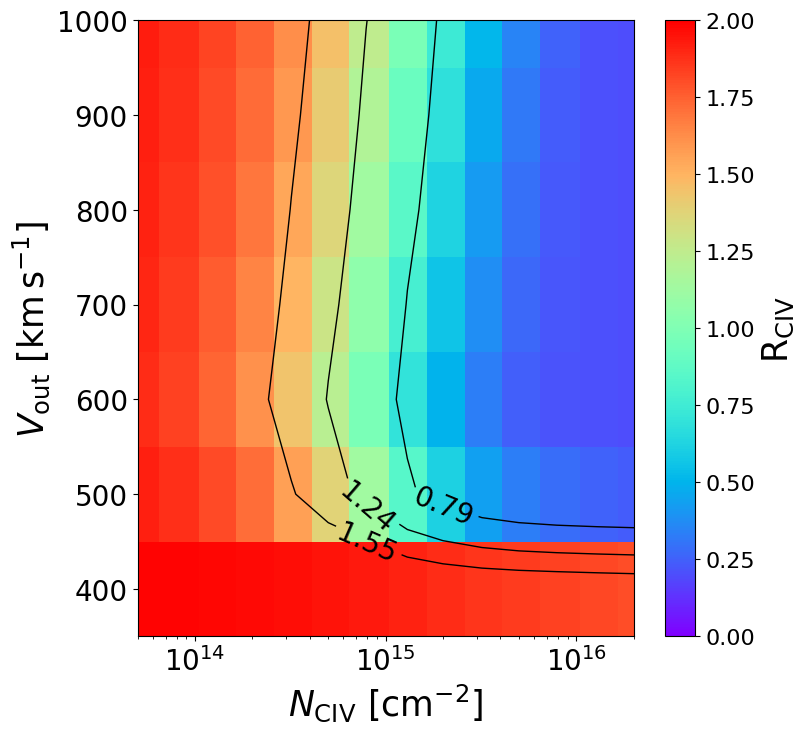

In [17]:
import math
rr = np.arange(12, 17, 1, dtype=np.float128)
atom_N = [13,20,32,50,79]
total_N_c = np.outer(10**rr, atom_N) / 10
total_N_c = total_N_c.flatten()

def inf(x,y):
    summ = np.zeros(len(y))
    dx = x[1]- x[0]
    summ = np.sum(dx*y,axis=0)
    return summ

vel_k= 118
emit = 50
ratio_h = np.zeros((len(expand_vel),len(total_N_c)))
ratio_t = np.zeros((len(expand_vel),len(total_N_c)))

for ii,expand in enumerate(expand_vel):
    for jj, N_civ in enumerate(total_N_c):
            index = math.floor(math.log10(N_civ))
            atom_n = int(N_civ/ 10**index * 10)

            # halo_x_K = globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']>=-250]
            # halo_y_K = globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']>=-250]

            # halo_x_H = globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']<=750]
            # halo_y_H = globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']<=750]

            # # print(halo_x_H)
            # a_1 = inf(halo_x_K.to_numpy(),halo_y_K.to_numpy())
            # a_2 = inf(halo_x_H.to_numpy(), halo_y_H.to_numpy())
            # ratio_h[ii][jj] = a_1/ a_2


            tot_x_K = globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']>=-250]
            tot_y_K = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']>=-250]

            tot_x_H = globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']<=750]
            tot_y_H = globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']<=750]


            # a_3 = inf(tot_x_K.to_numpy(),tot_y_K.to_numpy())
            # a_4 = inf(tot_x_H.to_numpy(), tot_y_H.to_numpy())

            xx_k= np.where((globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']>= -250) & (globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']<=250))  
            yy_k = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][xx_k]
            

            xx_h= np.where((globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] >= 250) & (globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] <= 750)) 
            yy_h = globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][xx_h]        


            ratio_t[ii][jj] = np.sum(yy_k,0) / np.sum(yy_h,0)

            # ratio_t[ii][jj] = a_3/ a_4


fig = plt.figure(1,figsize=(8,8))
x = np.array(total_N_c, dtype=np.float64)
y = np.array(expand_vel, dtype=np.float64)
X, Y = np.meshgrid(x, y)
Z = np.array(ratio_t, dtype=np.float64)

# 무지개 색상 맵을 적용
# cset = plt.contour(X, Y, Z, cmap='gray',linewidths=2)
plt.pcolormesh(X, Y, Z, shading='auto', cmap='rainbow',vmin=0,vmax=2.0)
cbar = plt.colorbar()

cbar.set_label(r'$\rm R_{\rm CIV}$',fontsize=25)
cbar.ax.tick_params(labelsize=16)  # colorbar 눈금 크기 조정

plt.xscale('log')
plt.xlabel(r'$N_{\rm CIV} ~ [\rm cm^{-2}]$',fontsize=25)
plt.ylabel(r'$V_{\rm out} ~ [\rm km\,s^{-1}]$',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(5*10**13,2*10**16)
plt.ylim(350,1000)
contours = plt.contour(X, Y, Z, levels=[0.79,1.24,1.55], colors='black', linewidths=1)
plt.clabel(contours, inline=True, fontsize=20, fmt='%1.2f', inline_spacing=5)
# plt.colorbar(plot)

# plt.show()
plt.savefig(f'/home/jin/바탕화면/2D_plot_V_out_N_CIV_obs_50.png',bbox_inches='tight')


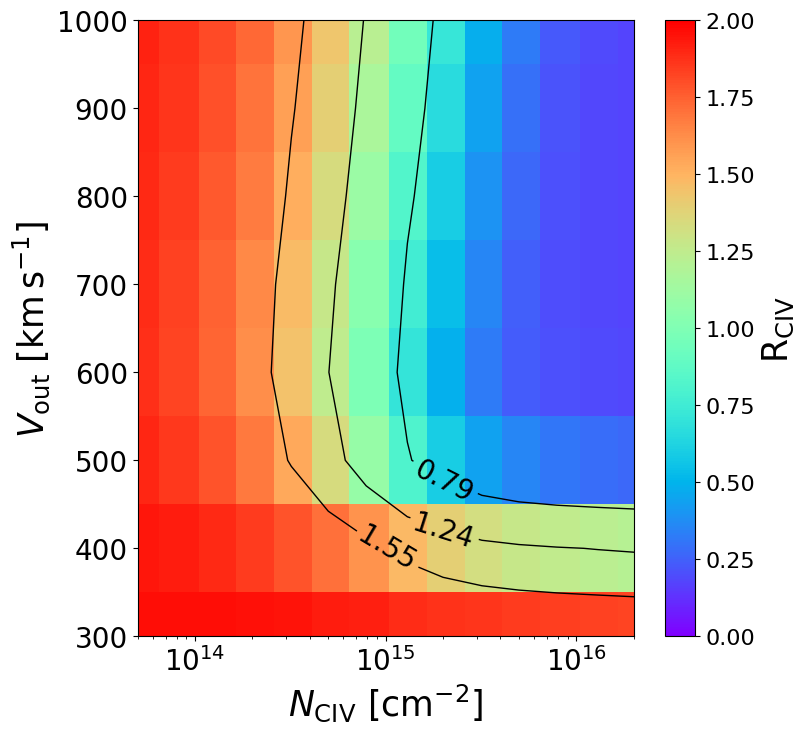

In [19]:
import math
rr = np.arange(12, 17, 1, dtype=np.float128)
atom_N = [13,20,32,50,79]
total_N_c = np.outer(10**rr, atom_N) / 10
total_N_c = total_N_c.flatten()

def inf(x,y):
    summ = np.zeros(len(y))
    dx = x[1]- x[0]
    summ = np.sum(dx*y,axis=0)
    return summ

vel_k= 50
emit = 100
ratio_h = np.zeros((len(expand_vel),len(total_N_c)))
ratio_t = np.zeros((len(expand_vel),len(total_N_c)))

for ii,expand in enumerate(expand_vel):
    for jj, N_civ in enumerate(total_N_c):
            index = math.floor(math.log10(N_civ))
            atom_n = int(N_civ/ 10**index * 10)

            # halo_x_K = globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']>=-250]
            # halo_y_K = globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']>=-250]

            # halo_x_H = globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']<=750]
            # halo_y_H = globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']<=750]

            # # print(halo_x_H)
            # a_1 = inf(halo_x_K.to_numpy(),halo_y_K.to_numpy())
            # a_2 = inf(halo_x_H.to_numpy(), halo_y_H.to_numpy())
            # ratio_h[ii][jj] = a_1/ a_2


            xx_k= np.where((globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']>= -250) & (globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']<=250))  
            yy_k = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][xx_k]
            

            xx_h= np.where((globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] >= 250) & (globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] <= 750)) 
            yy_h = globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][xx_h]        


            ratio_t[ii][jj] = np.sum(yy_k,0) / np.sum(yy_h,0)


fig = plt.figure(1,figsize=(8,8))
x = np.array(total_N_c, dtype=np.float64)
y = np.array(expand_vel, dtype=np.float64)
X, Y = np.meshgrid(x, y)
Z = np.array(ratio_t, dtype=np.float64)

# 무지개 색상 맵을 적용
# cset = plt.contour(X, Y, Z, cmap='gray',linewidths=2)
plt.pcolormesh(X, Y, Z, shading='auto', cmap='rainbow',vmin=0,vmax=2.0)
cbar = plt.colorbar()

cbar.set_label(r'$\rm R_{\rm CIV}$',fontsize=25)
cbar.ax.tick_params(labelsize=16)  # colorbar 눈금 크기 조정

plt.xscale('log')
plt.xlabel(r'$N_{\rm CIV} ~ [\rm cm^{-2}]$',fontsize=25)
plt.ylabel(r'$V_{\rm out} ~ [\rm km\,s^{-1}]$',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(5*10**13,2*10**16)
plt.ylim(300,1000)
contours = plt.contour(X, Y, Z, levels=[0.79,1.24,1.55], colors='black', linewidths=1)
plt.clabel(contours, inline=True, fontsize=20, fmt='%1.2f', inline_spacing=5)
# plt.colorbar(plot)
# plt.text(2e15,900,f'$\sigma_{{\\rm emit}}$={emit}',size=20)
# plt.text(2.75e15,850,f'$V_{{\\rm R}}$={vel_k}',size=20)
plt.savefig(f'/home/jin/바탕화면/2D_plot_V_out_N_CIV_obs_{emit}_{vel_k}.png',bbox_inches='tight')


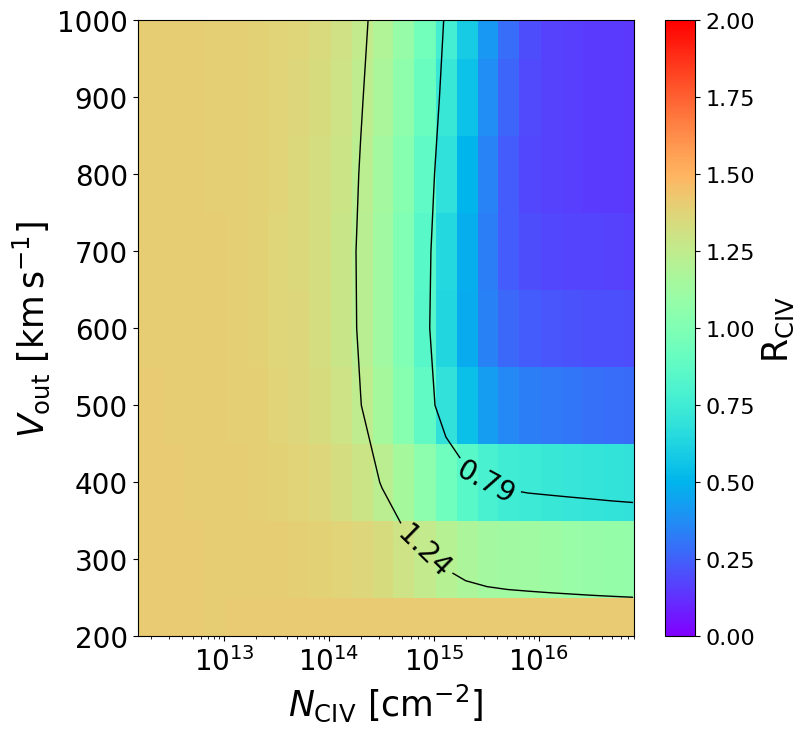

2

In [ ]:
import math
rr = np.arange(12, 17, 1, dtype=np.float128)
atom_N = [13,20,32,50,79]
total_N_c = np.outer(10**rr, atom_N) / 10
total_N_c = total_N_c.flatten()

def inf(x,y):
    summ = np.zeros(len(y))
    dx = x[1]- x[0]
    summ = np.sum(dx*y,axis=0)
    return summ

vel_k= 118
emit = 300
ratio_h = np.zeros((len(expand_vel),len(total_N_c)))
ratio_t = np.zeros((len(expand_vel),len(total_N_c)))

for ii,expand in enumerate(expand_vel):
    for jj, N_civ in enumerate(total_N_c):
            index = math.floor(math.log10(N_civ))
            atom_n = int(N_civ/ 10**index * 10)

            # halo_x_K = globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']>=-250]
            # halo_y_K = globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']>=-250]

            # halo_x_H = globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']<=750]
            # halo_y_H = globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']<=750]

            # # print(halo_x_H)
            # a_1 = inf(halo_x_K.to_numpy(),halo_y_K.to_numpy())
            # a_2 = inf(halo_x_H.to_numpy(), halo_y_H.to_numpy())
            # ratio_h[ii][jj] = a_1/ a_2


            tot_x_K = globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']>=-250]
            tot_y_K = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']>=-250]

            tot_x_H = globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']<=750]
            tot_y_H = globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']<=750]


            xx_k= np.where((globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']>= -250) & (globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']<=250))  
            yy_k = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}'][xx_k]
            

            xx_h= np.where((globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] >= 250) & (globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] <= 750)) 
            yy_h = globals()[f'tot_vy_H_{atom_n}_{index}_{expand}'][xx_h]        


            ratio_t[ii][jj] = np.sum(yy_k,0) / np.sum(yy_h,0)


            
fig = plt.figure(1,figsize=(8,8))
x = np.array(total_N_c, dtype=np.float64)
y = np.array(expand_vel, dtype=np.float64)
X, Y = np.meshgrid(x, y)
Z = np.array(ratio_t, dtype=np.float64)

# 무지개 색상 맵을 적용
# cset = plt.contour(X, Y, Z, cmap='gray',linewidths=2)
plt.pcolormesh(X, Y, Z, shading='auto', cmap='rainbow',vmin=0,vmax=2.0)
cbar = plt.colorbar()

cbar.set_label(r'$\rm R_{\rm CIV}$',fontsize=25)
cbar.ax.tick_params(labelsize=16)  # colorbar 눈금 크기 조정

plt.xscale('log')
plt.xlabel(r'$N_{\rm CIV} ~ [\rm cm^{-2}]$',fontsize=25)
plt.ylabel(r'$V_{\rm out} ~ [\rm km\,s^{-1}]$',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(1.5*10**12,8*10**16)
plt.ylim(200,1000)
contours = plt.contour(X, Y, Z, levels=[0.79,1.24,1.55], colors='black', linewidths=1)
plt.clabel(contours, inline=True, fontsize=20, fmt='%1.2f', inline_spacing=5)
# plt.colorbar(plot)

plt.show()
# plt.savefig(f'/home/jin/바탕화면/2D_plot_V_out_N_CIV_obs_300.png',bbox_inches='tight')
2

In [ ]:
import math
rr = np.arange(12, 17, 1, dtype=np.float128)
atom_N = [13,20,32,50,79]
total_N_c = np.outer(10**rr, atom_N) / 10
total_N_c = total_N_c.flatten()

def inf(x,y):
    summ = np.zeros(len(y))
    dx = x[1]- x[0]
    summ = np.sum(dx*y,axis=0)
    return summ

vel_k= 30
emit = 50
ratio_h = np.zeros((len(expand_vel),len(total_N_c)))
ratio_t = np.zeros((len(expand_vel),len(total_N_c)))

for ii,expand in enumerate(expand_vel):
    for jj, N_civ in enumerate(total_N_c):
            index = math.floor(math.log10(N_civ))
            atom_n = int(N_civ/ 10**index * 10)

            a_1 = inf(globals()[f'halo_x_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'halo_y_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())
            a_2 = inf(globals()[f'halo_x_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'halo_y_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())
            ratio_h[ii][jj] = a_1/ a_2

            xx_k= np.where((globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']>= -250) & (globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']<=250))  
            yy_k = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}'][xx_k]
            

            xx_h= np.where((globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] >= 250) & (globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] <= 750)) 
            yy_h = globals()[f'tot_vy_H_{atom_n}_{index}_{expand}'][xx_h]        


            ratio_t[ii][jj] = np.sum(yy_k,0) / np.sum(yy_h,0)


fig = plt.figure(1,figsize=(8,8))
x = np.array(total_N_c, dtype=np.float64)
y = np.array(expand_vel, dtype=np.float64)
X, Y = np.meshgrid(x, y)
Z = np.array(ratio_t, dtype=np.float64)

# 무지개 색상 맵을 적용
# cset = plt.contour(X, Y, Z, cmap='gray',linewidths=2)
plt.pcolormesh(X, Y, Z, shading='auto', cmap='rainbow')
cbar = plt.colorbar()

cbar.set_label(r'$\rm R_{\rm CIV}$',fontsize=25)
cbar.ax.tick_params(labelsize=16)  # colorbar 눈금 크기 조정

plt.xscale('log')
plt.xlabel(r'$N_{\rm CIV} ~ [\rm cm^{-2}]$',fontsize=25)
plt.ylabel(r'$V_{\rm out} ~ [\rm km\,s^{-1}]$',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(1.5*10**12,8*10**16)
plt.ylim(300,1000)
contours = plt.contour(X, Y, Z, levels=[0.8,1.25,1.55,2.0], colors='black', linewidths=1)
plt.clabel(contours, inline=True, fontsize=20, fmt='%1.2f', inline_spacing=5)
# plt.colorbar(plot)

plt.show()
# plt.savefig(f'/home/jin/바탕화면/2D_plot_V_out_N_CIV_obs',bbox_inches='tight')


KeyError: 'halo_x_K_13_12_0_30_50'

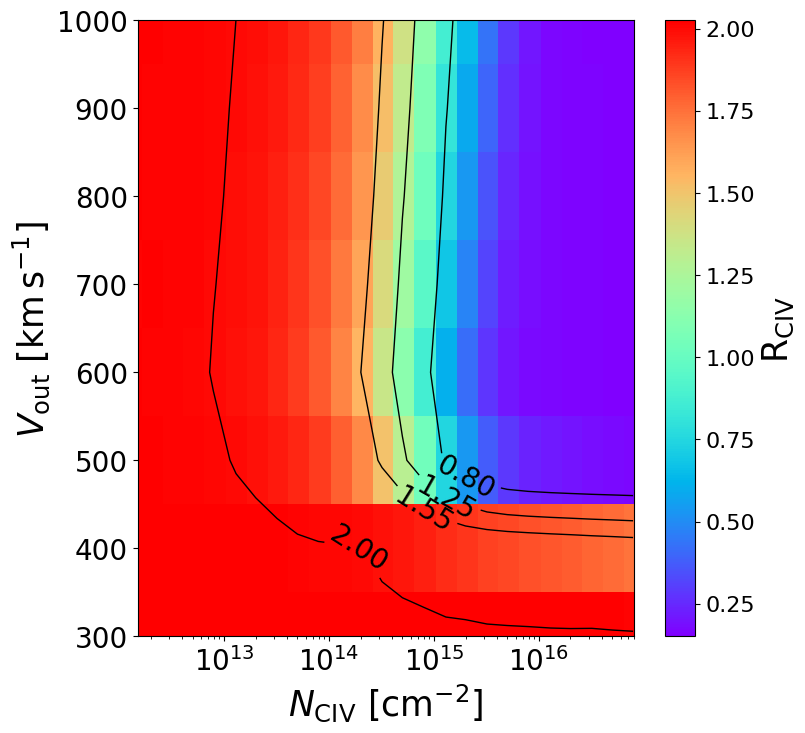

In [ ]:
import math
rr = np.arange(12, 17, 1, dtype=np.float128)
atom_N = [13,20,32,50,79]
total_N_c = np.outer(10**rr, atom_N) / 10
total_N_c = total_N_c.flatten()

def inf(x,y):
    summ = np.zeros(len(y))
    dx = x[1]- x[0]
    summ = np.sum(dx*y,axis=0)
    return summ

vel_k= 50
emit = 50
ratio_h = np.zeros((len(expand_vel),len(total_N_c)))
ratio_t = np.zeros((len(expand_vel),len(total_N_c)))

for ii,expand in enumerate(expand_vel):
    for jj, N_civ in enumerate(total_N_c):
            index = math.floor(math.log10(N_civ))
            atom_n = int(N_civ/ 10**index * 10)

            a_1 = inf(globals()[f'halo_x_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'halo_y_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())
            a_2 = inf(globals()[f'halo_x_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'halo_y_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())
            ratio_h[ii][jj] = a_1/ a_2

            xx_k= np.where((globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']>= -250) & (globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']<=250))  
            yy_k = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}'][xx_k]
            

            xx_h= np.where((globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] >= 250) & (globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] <= 750)) 
            yy_h = globals()[f'tot_vy_H_{atom_n}_{index}_{expand}'][xx_h]        


            ratio_t[ii][jj] = np.sum(yy_k,0) / np.sum(yy_h,0)


fig = plt.figure(1,figsize=(8,8))
x = np.array(total_N_c, dtype=np.float64)
y = np.array(expand_vel, dtype=np.float64)
X, Y = np.meshgrid(x, y)
Z = np.array(ratio_t, dtype=np.float64)

# 무지개 색상 맵을 적용
# cset = plt.contour(X, Y, Z, cmap='gray',linewidths=2)
plt.pcolormesh(X, Y, Z, shading='auto', cmap='rainbow')
cbar = plt.colorbar()

cbar.set_label(r'$\rm R_{\rm CIV}$',fontsize=25)
cbar.ax.tick_params(labelsize=16)  # colorbar 눈금 크기 조정

plt.xscale('log')
plt.xlabel(r'$N_{\rm CIV} ~ [\rm cm^{-2}]$',fontsize=25)
plt.ylabel(r'$V_{\rm out} ~ [\rm km\,s^{-1}]$',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(1.5*10**12,8*10**16)
plt.ylim(300,1000)
contours = plt.contour(X, Y, Z, levels=[0.8,1.25,1.55,2.0], colors='black', linewidths=1)
plt.clabel(contours, inline=True, fontsize=20, fmt='%1.2f', inline_spacing=5)
# plt.colorbar(plot)

plt.show()
# plt.savefig(f'/home/jin/바탕화면/2D_plot_V_out_N_CIV_obs',bbox_inches='tight')


In [ ]:
# import math
# rr = np.arange(12, 17, 1, dtype=np.float128)
# atom_N = [13,20,32,50,79]
# total_N_c = np.outer(10**rr, atom_N) / 10
# total_N_c = total_N_c.flatten()

# def inf(x,y):
#     summ = np.zeros(len(y))
#     dx = x[1]- x[0]
#     summ = np.sum(dx*y,axis=0)
#     return summ

# vel_k= 118
# emit = 50
# ratio_h = np.zeros((len(expand_vel),len(total_N_c)))
# ratio_t = np.zeros((len(expand_vel),len(total_N_c)))

# for ii,expand in enumerate(expand_vel):
#     for jj, N_civ in enumerate(total_N_c):
#             index = math.floor(math.log10(N_civ))
#             atom_n = int(N_civ/ 10**index * 10)

#             a_1 = inf(globals()[f'halo_x_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'halo_y_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())
#             a_2 = inf(globals()[f'halo_x_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'halo_y_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())
#             ratio_h[ii][jj] = a_1/ a_2

#             a_3 = inf(globals()[f'tot_x_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'tot_y_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())
#             a_4 = inf(globals()[f'tot_x_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'tot_y_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())
#             ratio_t[ii][jj] = a_3/ a_4


In [ ]:
# fig = plt.figure(1,figsize=(10,8))
# x = np.array(total_N_c, dtype=np.float64)
# y = np.array(expand_vel, dtype=np.float64)
# X, Y = np.meshgrid(x, y)
# Z = np.array(ratio_t, dtype=np.float64)

# plt.contourf(X, Y, Z)
# cbar = plt.colorbar()
# cbar.set_label(r'$\rm R_{\rm CIV}$', fontsize=25)
# cbar.ax.tick_params(labelsize=16)  # 눈금 레이블 크기 조정

# # 눈금 값 설정 (원하는 값으로 조정)
# cbar.set_ticks([0.0,0.5, 1.0, 1.5, 2.0])

# plt.xscale('log')
# plt.xlabel(r'$N_{\rm CIV} ~ [\rm cm^{-2}]$',fontsize=25)
# plt.ylabel(r'$V_{\rm out} ~ [\rm km\,s^{-1}]$',fontsize=25)
# contours = plt.contour(X, Y, Z, levels=[0.25, 0.5, 1.0, 1.5, 2.0], colors='black', linewidths=1)
# plt.clabel(contours, inline=True, fontsize=20, fmt='%1.2f', inline_spacing=5)
# # contours = plt.contour(X, Y, Z, colors='black', linewidths=1)
# # plt.clabel(contours, inline=True, fontsize=20, fmt='%1.1f', inline_spacing=15)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.xlim(1.5*10**12,5*10**16)

# # plt.savefig(f'/home/jin/바탕화면/2D_plot_V_out_N_CIV.png',bbox_inches='tight')

In [ ]:
import math
rr = np.arange(12, 17, 1, dtype=np.float128)
atom_N = [13,20,32,50,79]
total_N_c = np.outer(10**rr, atom_N) / 10
total_N_c = total_N_c.flatten()

def inf(x,y):
    summ = np.zeros(len(y))
    dx = x[1]- x[0]
    summ = np.sum(dx*y,axis=0)
    return summ

vel_k= 118
emit = 50

atom_n = 50
index = 14

emit = np.arange(100,700,100)
emit = np.append([1,50],emit)
ratio_h = np.zeros((len(expand_vel),len(emit )))
ratio_t = np.zeros((len(expand_vel),len(emit )))
for ii,expand in enumerate(expand_vel):
    for jj, emit_n in enumerate(emit):


            a_1 = inf(globals()[f'halo_x_K_{atom_n}_{index}_{expand}_{vel_k}_{emit_n}'].to_numpy(),globals()[f'halo_y_K_{atom_n}_{index}_{expand}_{vel_k}_{emit_n}'].to_numpy())
            a_2 = inf(globals()[f'halo_x_H_{atom_n}_{index}_{expand}_{vel_k}_{emit_n}'].to_numpy(),globals()[f'halo_y_H_{atom_n}_{index}_{expand}_{vel_k}_{emit_n}'].to_numpy())
            ratio_h[ii][jj] = a_1/ a_2

            a_3 = inf(globals()[f'tot_x_K_{atom_n}_{index}_{expand}_{vel_k}_{emit_n}'].to_numpy(),globals()[f'tot_y_K_{atom_n}_{index}_{expand}_{vel_k}_{emit_n}'].to_numpy())
            a_4 = inf(globals()[f'tot_x_H_{atom_n}_{index}_{expand}_{vel_k}_{emit_n}'].to_numpy(),globals()[f'tot_y_H_{atom_n}_{index}_{expand}_{vel_k}_{emit_n}'].to_numpy())
            ratio_t[ii][jj] = a_3/ a_4


(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000')])

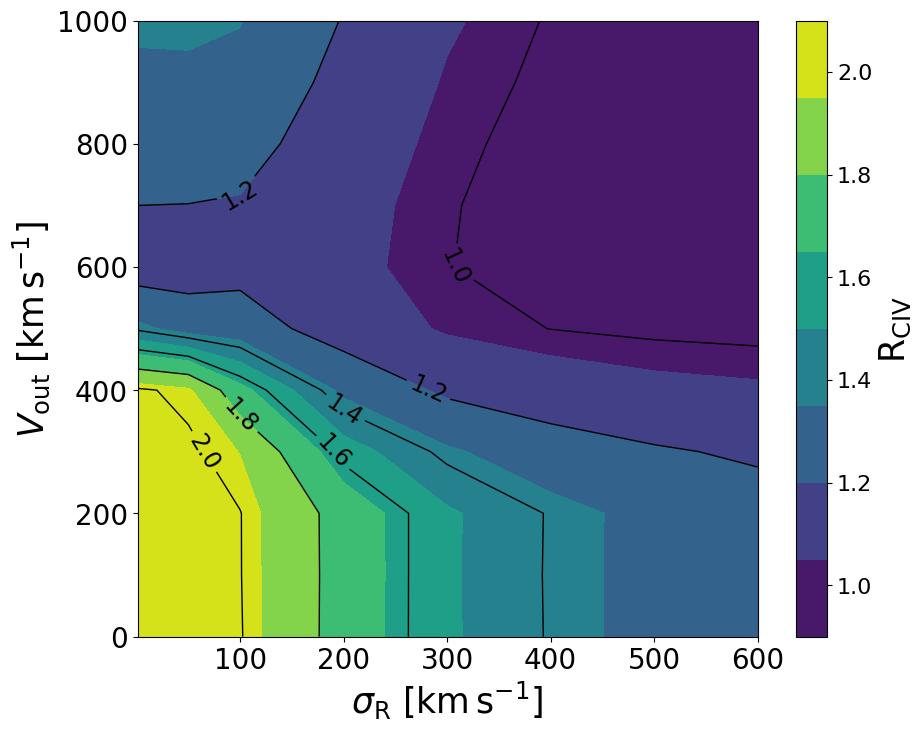

In [ ]:
fig = plt.figure(1,figsize=(10,8))
x = np.array(emit, dtype=np.float64)
y = np.array(expand_vel, dtype=np.float64)
X, Y = np.meshgrid(x, y)
Z = np.array(ratio_t, dtype=np.float64)

plt.contourf(X, Y, Z)
cbar = plt.colorbar()
cbar.set_label(r'$\rm R_{\rm CIV}$', fontsize=25)
cbar.ax.tick_params(labelsize=16)  # 눈금 레이블 크기 조정

# 눈금 값 설정 (원하는 값으로 조정)
cbar.set_ticks([1.0,1.2,1.4,1.6, 1.8, 2.0])

# plt.xscale('log')
plt.xlabel(r'$\sigma_{\rm R} ~ [\rm km\,s^{-1}]$',fontsize=25)
plt.ylabel(r'$V_{\rm out} ~ [\rm km\,s^{-1}]$',fontsize=25)
contours = plt.contour(X, Y, Z, levels=[1.0, 1.2, 1.4,1.6,1.8,2.0], colors='black', linewidths=1) #levels=[1.0, 1.1, 1.2, 1.3, 1.4,1.5,1.6,1.7,1.8,1.9,2.0]
plt.clabel(contours, inline=True, fontsize=17, fmt='%1.1f', inline_spacing=5)
# contours = plt.contour(X, Y, Z, colors='black', linewidths=1)
# plt.clabel(contours, inline=True, fontsize=20, fmt='%1.1f', inline_spacing=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(1.5*10**12,5*10**16)

# plt.savefig(f'/home/jin/바탕화면/2D_plot_V_out_sig.png',bbox_inches='tight')